In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
cambodia = gpd.read_file('kh.json')

In [4]:
cambodia.head()

,source,id,name,geometry
0,https://simplemaps.com,KH1,Banteay Meanchey,"MULTIPOLYGON (((103.42249 13.7337, 103.42511 1..."
1,https://simplemaps.com,KH2,Battambang,"POLYGON ((102.3573 13.47571, 102.3905 13.4765,..."
2,https://simplemaps.com,KH3,Kampong Cham,"POLYGON ((105.73352 12.50128, 105.73431 12.497..."
3,https://simplemaps.com,KH4,Kampong Chhnang,"MULTIPOLYGON (((104.87268 12.2381, 104.87451 1..."
4,https://simplemaps.com,KH5,Kampong Speu,"POLYGON ((104.19928 12.07672, 104.20068 12.073..."


In [5]:
print("Columns in cambodia GeoDataFrame:")
print(cambodia.columns)

Columns in cambodia GeoDataFrame:
Index(['source', 'id', 'name', 'geometry'], dtype='object')


In [6]:
df = pd.read_excel('paddyLabel.xlsx')
df1 = pd.read_excel("cassavaLabel.xlsx")
df2 =pd.read_excel("maizeLabel.xlsx")

In [ ]:
import pandas as pd 

cambodia['join_key'] = cambodia['name'].str.strip().str.upper()

df1['join_key'] = df1['province'].str.strip().str.upper()


merged = cambodia.merge(
    df1[['join_key', 'label']], 
    on='join_key',             
    how='left' )                


merged = merged.drop(columns=['join_key'])

merged['label'] = merged['label'].fillna('No Data')

print(f"Merge successful! Total provinces: {len(merged)}")
print(merged.head())

Merge successful! Total provinces: 57
                   source   id              name  \
0  https://simplemaps.com  KH1  Banteay Meanchey   
1  https://simplemaps.com  KH1  Banteay Meanchey   
2  https://simplemaps.com  KH2        Battambang   
3  https://simplemaps.com  KH2        Battambang   
4  https://simplemaps.com  KH3      Kampong Cham   

                                            geometry label  
0  MULTIPOLYGON (((103.42249 13.7337, 103.42511 1...  High  
1  MULTIPOLYGON (((103.42249 13.7337, 103.42511 1...  High  
2  POLYGON ((102.3573 13.47571, 102.3905 13.4765,...  High  
3  POLYGON ((102.3573 13.47571, 102.3905 13.4765,...  High  
4  POLYGON ((105.73352 12.50128, 105.73431 12.497...  High  



✅ Map saved successfully with the recommended color scheme and labels.


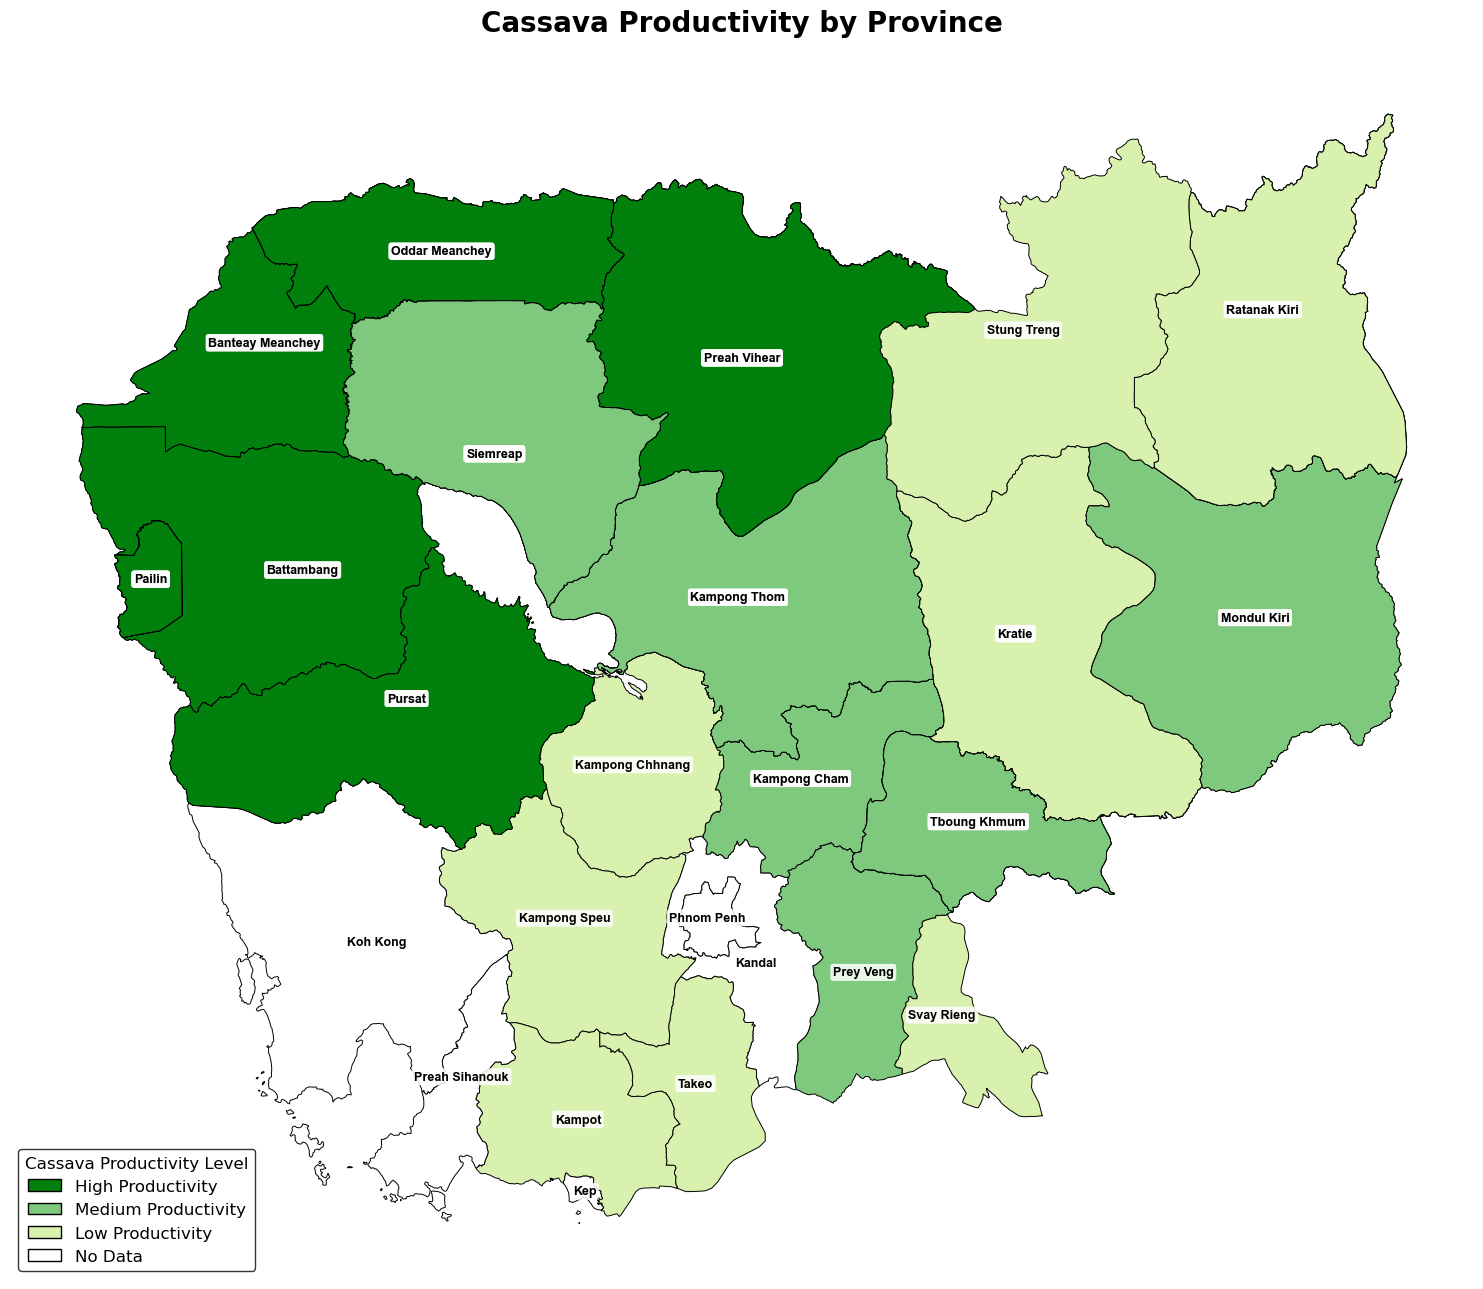

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from collections import OrderedDict 

label_colors = {
    'High Productivity': "#02800D",     
    'Medium Productivity': '#7FC97F',   
    'Low Productivity': '#D8F1AE',      
    'No Data': '#FFFFFF'                
}


merged['label'] = (merged['label']
                   .replace('Loroductivity', 'Low Productivity')
                   .replace('High', 'High Productivity')
                   .replace('Medium', 'Medium Productivity')
                   .replace('Low', 'Low Productivity')
                   .fillna('No Data')
                   .str.strip()
                  )

merged['color'] = merged['label'].map(label_colors).fillna('#FFFFFF') 

fig, ax = plt.subplots(figsize=(16, 13), facecolor='white')


merged.plot(
    ax=ax, 
    color=merged['color'], 
    edgecolor='black', 
    linewidth=0.7 
) 


for idx, row in merged.iterrows():
    point = row['geometry'].representative_point()
    province_name = row['name']
    
    ax.text(
    point.x, point.y, province_name,
    fontsize=9,
    fontfamily='Arial',
    fontweight='bold',
    color='black',
    ha='center',
    va='center',
    bbox=dict(
        facecolor='white',
        alpha=0.85,
        edgecolor='none',        
        boxstyle='round,pad=0.2'  
    )
)

legend_elements = [
    Patch(facecolor='#02800D', edgecolor='black', label='High Productivity'),
    Patch(facecolor='#7FC97F', edgecolor='black', label='Medium Productivity'),
    Patch(facecolor="#D8F1AE", edgecolor='black', label='Low Productivity'), 
    Patch(facecolor='#FFFFFF', edgecolor='black', label='No Data')
]

ax.legend(
    handles=legend_elements, 
    loc='lower left', 
    title='Cassava Productivity Level', 
    fontsize=12, 
    title_fontsize=12,
    frameon=True, 
    edgecolor='black'
)

plt.title('Cassava Productivity by Province', fontsize=20, weight='bold', pad=20) 
plt.axis('off')
plt.tight_layout()

plt.savefig('maize_productivity_final_pro_res_v4.png', dpi=400) 
print("\n Map saved successfully with the recommended color scheme and labels.")

plt.show()